## Data Scientists
- Walker Teotônio Correia de Barros
- Maria Luiza Leite dos Santos
- Benn Arthur de Souza Fonseca Amaral
- Kennyo Wescley Elias Cavalcante

## Introduction
This analysis aims to provide metrics that assist investors in making decisions in the business intelligence application domain

## Data

#### Available historical series 
http://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/

Contains the historical quotation information regarding the trading of all market paper for a period of one year, sorted by the fields Record Type, Trade Date, BDI Code, Company Name and Trading Code


In [4]:
!pip install seaborn
!pip install scikit-learn
!pip install plotly

^C


## Modules (Collections of database)

In [41]:
#Data Vizualizations
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

#Machine Learning Library
from sklearn.datasets import make_blobs # function to generate aleatory dataset
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn

#Math and Linear Algebra
import numpy as np
from math import sqrt
from scipy.stats import variation
#Create DataFrames
import pandas as pd

#Anapy Modules
'''Anapy is a repository created to solve problems involving statistical measures in our solution.'''
from anapy import shifting

<blockquote>Those datas are from Bovespa, in October of the year 2022<blockquote>

## Pre-processing of data 

#### Stage 1 - Structuring

 

To obtain the necessary data for the sample analysis, it was necessary to use some data preprocessing techniques. Since our sample was derived from a txt file, and the columns were not named, this had to be done manually using the .columns attribute, and the values had to be adjusted with commas.

In [47]:


#this file is compressed in the datasets repository, 
#extract it before running this code snippet
arquivo_bovespa = './datasets/COTAHIST_M102022.TXT' 


#Define the size of fields
tamanho_campos=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]

# Read the data and receive two positional arguments, widhts who have the fields size and header = 0
dados_acoes=pd.read_fwf(arquivo_bovespa, widths=tamanho_campos, header=0)


# Name the columns
# Data structure available at http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf
dados_acoes.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Remove last line
linha=len(dados_acoes["data_pregao"])
dados_acoes=dados_acoes.drop(linha-1)

# Adjust values with a comma (divide the values of these columns by 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
]

for coluna in listaVirgula:
    dados_acoes[coluna]=[i/100. for i in dados_acoes[coluna]]


##### Data types

In [46]:
## Get Variable information
dados_acoes.info()

## Correct data types
#dados_acoes["cod_negociacao"] = dados_acoes["cod_negociacao"].astype('|S') #Transforma o objeto em string
#dados_acoes["codigo_isin"] = dados_acoes["codigo_isin"].astype('|S') #Transforma o objeto em string


dados_acoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181806 entries, 0 to 37134
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   tipo_registro                 181806 non-null  int64  
 1   data_pregao                   181806 non-null  object 
 2   cod_bdi                       181806 non-null  float64
 3   cod_negociacao                181806 non-null  |S9    
 4   tipo_mercado                  181806 non-null  int64  
 5   empresa                       181806 non-null  object 
 6   especificacao_papel           181806 non-null  object 
 7   preco_abertura                181806 non-null  float64
 8   preco_maximo                  181806 non-null  float64
 9   preco_minimo                  181806 non-null  float64
 10  preco_medio                   181806 non-null  float64
 11  preco_ultimo_negocio          181806 non-null  float64
 12  preco_melhor_oferta_compra    181806 non-null

#### Stage 2 - Remove Missing Data
During pre-processing, we also found data that did not make sense for analysis, or that were absurdly discrepant from the context of the application, probably caused by errors in the collection, so it was necessary to eliminate records that could cause problems in the measurements obtained

In [12]:
#Identify missing data
dados_acoes.isnull().sum()

tipo_registro                       0
data_pregao                         0
cod_bdi                             0
cod_negociacao                      0
tipo_mercado                        0
empresa                             0
especificacao_papel                 0
prazo_dias_merc_termo           33457
moeda_referencia                    0
preco_abertura                      0
preco_maximo                        0
preco_minimo                        0
preco_medio                         0
preco_ultimo_negocio                0
preco_melhor_oferta_compra          0
preco_melhor_oferta_venda           0
numero_negocios                     0
quantidade_papeis_negociados        0
volume_total_negociado              0
preco_exercicio                     0
ìndicador_correcao_precos           0
data_vencimento                     0
fator_cotacao                       0
preco_exercicio_pontos              0
codigo_isin                         0
num_distribuicao_papel              0
dtype: int64

In [13]:
## Removing missing data from df
dados_acoes = dados_acoes.dropna(axis=1)
dados_acoes.isnull().sum()

tipo_registro                   0
data_pregao                     0
cod_bdi                         0
cod_negociacao                  0
tipo_mercado                    0
empresa                         0
especificacao_papel             0
moeda_referencia                0
preco_abertura                  0
preco_maximo                    0
preco_minimo                    0
preco_medio                     0
preco_ultimo_negocio            0
preco_melhor_oferta_compra      0
preco_melhor_oferta_venda       0
numero_negocios                 0
quantidade_papeis_negociados    0
volume_total_negociado          0
preco_exercicio                 0
ìndicador_correcao_precos       0
data_vencimento                 0
fator_cotacao                   0
preco_exercicio_pontos          0
codigo_isin                     0
num_distribuicao_papel          0
dtype: int64

###### Anlysis of column "Indicadores de Correção de Preços"

{'mode': 0    0.0
Name: ìndicador_correcao_precos, dtype: float64, 'mean': 0.0, 'meadian': 0.0}


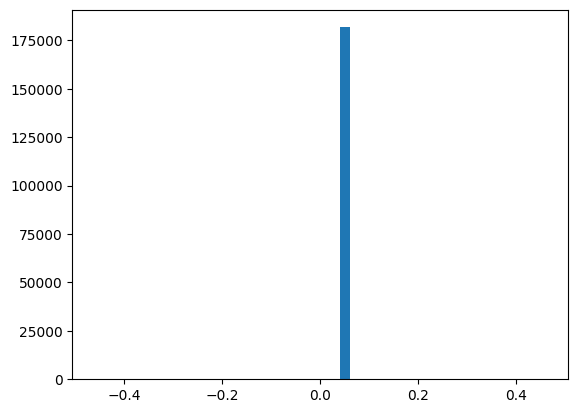

In [14]:
#There seems to be some noisy data here
plt.hist(x = dados_acoes["ìndicador_correcao_precos"], rwidth = 0.2)
indicador_correcao_precos = {
    "mode" : dados_acoes["ìndicador_correcao_precos"].mode() ,
    "mean" : dados_acoes["ìndicador_correcao_precos"].mean() ,
    "meadian" : dados_acoes["ìndicador_correcao_precos"].median()
}

## This column reveals nothing relevant
print(indicador_correcao_precos)

#Remove the column data_actions["price_correction_indicator"]
dados_acoes = dados_acoes.drop(["ìndicador_correcao_precos"], axis = "columns")

###### Analysis of column "preco_exercicio_pontos"

{'mode': 0    0.0
Name: preco_exercicio_pontos, dtype: float64, 'mean': 16459467.784341551, 'meadian': 0.0}


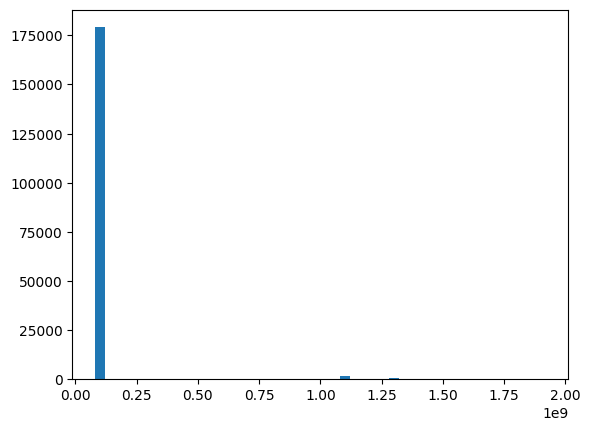

In [17]:
#There seems to be some noisy data here
plt.hist(x = dados_acoes["preco_exercicio_pontos"], rwidth = 0.2)
preco_exercicio_pontos = {
    "mode" : dados_acoes["preco_exercicio_pontos"].mode() ,
    "mean" : dados_acoes["preco_exercicio_pontos"].mean() ,
    "meadian" : dados_acoes["preco_exercicio_pontos"].median()
}
## This column reveals nothing relevant
print(preco_exercicio_pontos)
#Remove the column data_actions["price_correction_indicator"]
dados_acoes = dados_acoes.drop(["preco_exercicio_pontos"], axis = "columns")

In [18]:
#Sorts by dates of the last auctions for each record
dados_acoes = dados_acoes.sort_values(by=['data_pregao'])
dados_acoes

tipo_registro data_pregao  cod_bdi cod_negociacao  tipo_mercado  \
0                   1    20221003      2.0       b'ELMD3'            10   
158385              1    20221003     82.0    b'VALEW731'            80   
54388               1    20221003     78.0    b'BPACL266'            70   
158374              1    20221003     82.0    b'VALEN780'            80   
103762              1    20221003     82.0    b'NTCOW178'            80   
...               ...         ...      ...            ...           ...   
58580               1    20221031     78.0    b'EGIEL418'            70   
155990              1    20221031     78.0     b'VALEA92'            70   
173714              1    20221031     78.0    b'BOVVK120'            70   
41283               1    20221031     82.0    b'BBASX278'            80   
37134               1    20221031     82.0    b'AMERX125'            80   

            empresa especificacao_papel moeda_referencia  preco_abertura  \
0       ELETROMIDIA          ON      NM               R$           10.80   
158385    VALEE  FM          ON      NM               R$            2.90   
54388          BPAC          UNT     N2               R$            1.90   
158374        VALEE          ON      NM               R$            6.00   
103762        NTCOE          ON      NM               R$            3.25   
...             ...                 ...              ...             ...   
58580         EGIEE          ON      NM               R$            0.77   
155990         VALE          ON      NM               R$            4.22   
173714     BOVV  FM                  CI               R$            1.03   
41283         BBASE          ON      NM               R$            0.70   
37134         AMERE          ON      NM               R$            0.38   

        preco_maximo  ...  preco_melhor_oferta_compra  \
0              11.73  ...                       11.40   
158385          2.90  ...                        1.30   
54388           1.95  ...                        0.00   
158374          6.00  ...                        0.00   
103762          3.30  ...                        2.92   
...              ...  ...                         ...   
58580           1.19  ...                        0.00   
155990          5.02  ...                        0.00   
173714          1.03  ...                        0.00   
41283           0.70  ...                        0.30   
37134           0.40  ...                        0.01   

        preco_melhor_oferta_venda  numero_negocios  \
0                           11.44            680.0   
158385                       2.85             41.0   
54388                        0.00              2.0   
158374                       0.00              1.0   
103762                       0.00              5.0   
...                           ...              ...   
58580                        0.00              6.0   
155990                       0.00            153.0   
173714                       0.00              1.0   
41283                        0.88              1.0   
37134                        0.33              7.0   

        quantidade_papeis_negociados  volume_total_negociado  preco_exercicio  \
0                           216300.0               2469914.0             0.00   
158385                      110300.0                237538.0            69.84   
54388                         1500.0                  2900.0            26.60   
158374                         500.0                  3000.0            74.66   
103762                       21700.0                 70780.0            17.87   
...                              ...                     ...              ...   
58580                         4600.0                  3724.0            41.09   
155990                       32200.0                135846.0            70.41   
173714                           0.0                     1.0           120.00   
41283                          200.0              

#### > Those columns won't be usefull for data analysis, that's why we'll be removing it from the dataset

In [19]:
dados_acoes.drop(["moeda_referencia"], axis=1, inplace=True)
dados_acoes.drop(["fator_cotacao"], axis=1, inplace=True)

#### > Narrow the data by company

In [20]:
x = dados_acoes["empresa"].value_counts()

In [21]:
x[1:15]

VALEE        6220
PETR         4858
BBASE        3892
MGLUE        3198
BOVAE        2973
VALE         2305
COGNE        2023
VIIAE        1942
MGLU         1900
BBAS         1740
ABEVE        1655
CSNAE        1640
IBOVE  FM    1608
USIME        1534
Name: empresa, dtype: int64

##### >> In this case: PETRE

In [28]:
PETRE = dados_acoes[dados_acoes["empresa"] == "PETRE"]

## How are the prices of PETRE's latest trades centered?

#### First the price data of the last trades will be allocated to a one-dimensional Series object 

In [30]:
#Get the last business price  of PETRE
PETRE_last_value = empresa_1["preco_ultimo_negocio"]
PETRE_arr = np.array(PETRE_last_value)
type(PETRE_last_value)
type(PETRE_arr)

#Sort price of PETRE's last trades
PETRE_arr.sort()
print(PETRE_arr)

[1.000e-02 1.000e-02 1.000e-02 ... 4.877e+01 4.927e+01 4.977e+01]


In [31]:
PETRE_last_value.describe()

count    10027.000000
mean         4.105726
std          5.729424
min          0.010000
25%          0.240000
50%          1.700000
75%          5.750000
max         49.770000
Name: preco_ultimo_negocio, dtype: float64

#### The "central_tendency_measures" dictionary contains data on the measures of central tendency of the Series in question

In [33]:
central_tendency_measures = {
    "mean": PETRE_last_value.mean(),
    "mode": PETRE_last_value.mode(dropna = True),
    "median": PETRE_last_value.median(), 
    "max": PETRE_last_value.max(),
    "min": PETRE_last_value.min(),
}
pd.Series(central_tendency_measures)

mean                                               4.105726
mode      0    0.01
Name: preco_ultimo_negocio, dtype: f...
median                                                  1.7
max                                                   49.77
min                                                    0.01
dtype: object

## How PETRE's actions are distributed?


#### Variability Measures
Is there any uniformity between the measures that was found?

In [42]:
# output: [ 1  1  0  4 -5]
variability_measures = {
    "variance" : PETRE_last_value.var(),
    "standard deviation": PETRE_last_value.std(),
    "shifiting_range" : np.unique(shifting.shifting_range(PETRE_arr)),
    "CV" : variation(PETRE_last_value)
}
pd.Series(variability_measures)
 

[4.977e+01 1.000e-02 1.000e-02 ... 4.827e+01 4.877e+01 4.927e+01]


variance                                                      32.826294
standard deviation                                             5.729424
shifiting_range       [-49.760000000000005, 0.0, 0.00999999999999801...
CV                                                             1.395402
dtype: object

# - Inicial Exploration
##  Analysis of the company "Petrobrás" in October

### > Last traded price (Preço de último negócio)

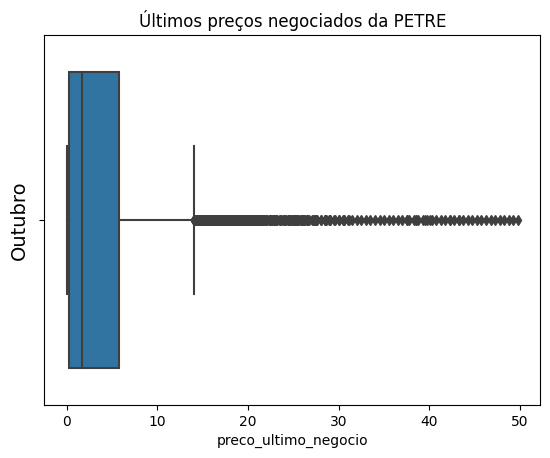

In [44]:
boxplot_empresa1_precoultimo_plt = sns.boxplot(x=empresa_1["preco_ultimo_negocio"]) # colocando o boxplot numa variável para manipular melhor
boxplot_empresa1_precoultimo_plt.set_ylabel('Outubro', fontsize=14) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

boxplot_empresa1_precoultimo_plt.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

# em R$ - Reais
plt.title('Últimos preços negociados da PETRE') # O título que se deseja colocar acima do gráfico

plt.show() # Impressão do gráfico

### > Total trading volume (Volume total negociado)

In [77]:
empresa_1["volume_total_negociado"].std()

6105593.487115129

In [78]:
empresa_1["volume_total_negociado"].mean()

710625.8090156578

In [79]:
empresa_1["volume_total_negociado"].median()

38973.0

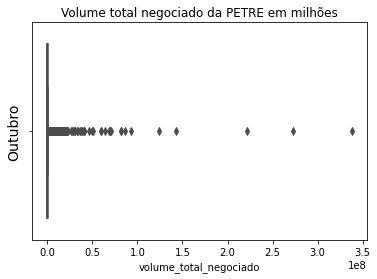

In [80]:
boxplot_empresa1_volumetotal_plt = sns.boxplot(x=empresa_1["volume_total_negociado"])
boxplot_empresa1_volumetotal_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_volumetotal_plt.plot()


plt.title('Volume total negociado da PETRE em milhões')

plt.show()

### > Number of Trades (Número de negócios)

In [81]:
empresa_1["numero_negocios"].std()

384.4783561749801

In [82]:
empresa_1["numero_negocios"].mean()

124.9536252119278

In [83]:
empresa_1["numero_negocios"].median()

13.0

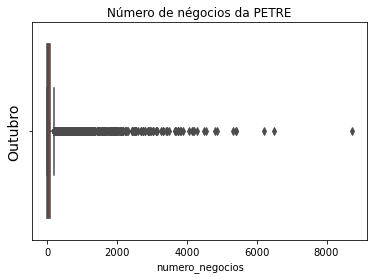

In [84]:
boxplot_empresa1_numeronegocios_plt = sns.boxplot(x=empresa_1["numero_negocios"])
boxplot_empresa1_numeronegocios_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_numeronegocios_plt.plot()


plt.title('Número de négocios da PETRE')

plt.show()

### > Maximum Closing Prices (Preço máximo das ações)

In [85]:
empresa_1["preco_maximo"].std()

5.776885233995995

In [86]:
empresa_1["preco_maximo"].mean()

4.266220205445269

In [87]:
empresa_1["preco_maximo"].median()

1.9

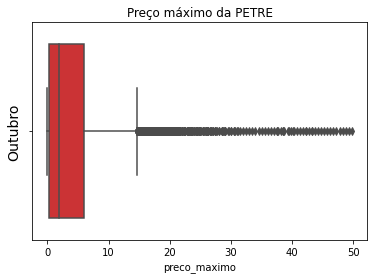

In [88]:
boxplot_empresa1_maximo_plt = sns.boxplot(x = empresa_1["preco_maximo"])
boxplot_empresa1_maximo_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_maximo_plt.plot()


plt.title('Preço máximo da PETRE') # em R$ - Reais

plt.show()

### > Minimum Closing Prices (Preço mínimo das ações)

In [89]:
empresa_1["preco_minimo"].std()

5.66094762431851

In [90]:
empresa_1["preco_minimo"].mean()

3.928716465543013

In [91]:
empresa_1["preco_minimo"].median()

1.5

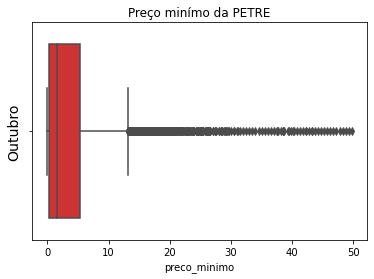

In [92]:
boxplot_empresa1_minimo_plt = sns.boxplot(x = empresa_1["preco_minimo"])
boxplot_empresa1_minimo_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_minimo_plt.plot()


plt.title('Preço minímo da PETRE') # em R$ - Reais

plt.show()

### > Stock Opening Price (Preço de abertura das ações)

In [93]:
empresa_1["preco_abertura"].mean()

4.09339283933376

In [94]:
empresa_1["preco_abertura"].std()

5.707135405067777

In [95]:
empresa_1["preco_abertura"].median()

1.71

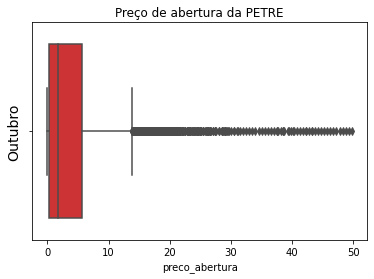

In [96]:
boxplot_empresa1_abertura_plt = sns.boxplot(x = empresa_1["preco_abertura"])
boxplot_empresa1_abertura_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_abertura_plt.plot()


plt.title('Preço de abertura da PETRE') # em R$ - Reais

plt.show()

### >> Table with some correlations

In [97]:
empresa_1[["preco_abertura", "preco_ultimo_negocio","preco_minimo","preco_maximo","numero_negocios","volume_total_negociado"]].corr()

preco_abertura  preco_ultimo_negocio  preco_minimo  \
preco_abertura                1.000000              0.997253      0.998526   
preco_ultimo_negocio          0.997253              1.000000      0.998425   
preco_minimo                  0.998526              0.998425      1.000000   
preco_maximo                  0.998428              0.998670      0.997138   
numero_negocios              -0.109370             -0.111930     -0.119470   
volume_total_negociado        0.207455              0.206519      0.207331   

                        preco_maximo  numero_negocios  volume_total_negociado  
preco_abertura              0.998428        -0.109370                0.207455  
preco_ultimo_negocio        0.998670        -0.111930                0.206519  
preco_minimo                0.997138        -0.119470                0.207331  
preco_maximo                1.000000        -0.102856                0.206406  
numero_negocios            -0.102856         1.000000                0.146719  
volume_total_negociado      0.206406         0.146719                1.000000

# Data Visualization

### - Scatter Plot

<AxesSubplot:xlabel='preco_abertura', ylabel='preco_ultimo_negocio'>

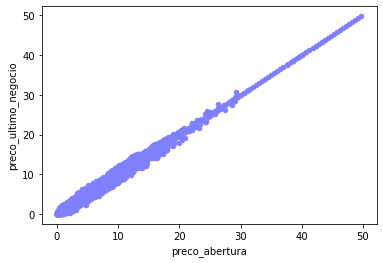

In [98]:
color=np.array([0.5, 0.5, 1]).reshape(1,-1)
empresa_1.plot.scatter(x="preco_abertura",y="preco_ultimo_negocio", c=color)

<AxesSubplot:xlabel='numero_negocios', ylabel='volume_total_negociado'>

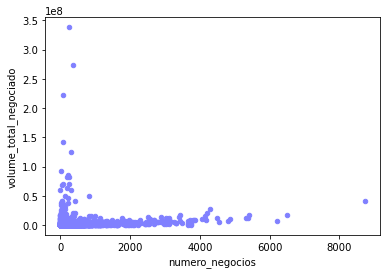

In [99]:
empresa_1.plot.scatter(x="numero_negocios",y="volume_total_negociado",c=color)

<AxesSubplot:xlabel='preco_minimo', ylabel='preco_maximo'>

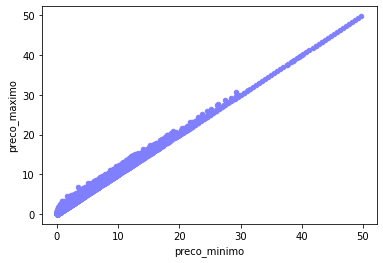

In [100]:
empresa_1.plot.scatter(x="preco_minimo",y="preco_maximo",c=color)

<AxesSubplot:xlabel='numero_negocios', ylabel='preco_ultimo_negocio'>

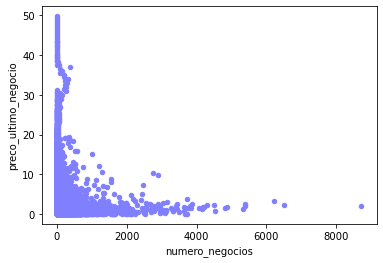

In [101]:
empresa_1.plot.scatter(x="numero_negocios",y="preco_ultimo_negocio",c=color)

<AxesSubplot:xlabel='volume_total_negociado', ylabel='preco_ultimo_negocio'>

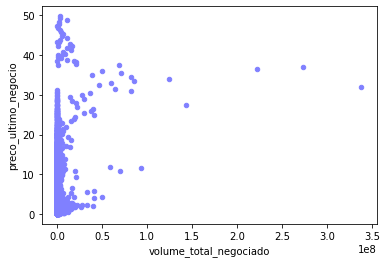

In [102]:
empresa_1.plot.scatter(x="volume_total_negociado",y="preco_ultimo_negocio",c=color)

In [103]:
#Using seaborn
sns.set_palette('Set1')

###### > Creating others dataframes of some companies from the main dataframe and then concatenating them.

In [104]:
empresa_2 = dados_acoes[dados_acoes["empresa"] == "VALEE"]
empresa_3 = dados_acoes[dados_acoes["empresa"] == "BBASE"]
empresa_4 = dados_acoes[dados_acoes["empresa"] == "MGLUE"]
empresa_5 = dados_acoes[dados_acoes["empresa"] == "COGNE"]
empresa_6 = dados_acoes[dados_acoes["empresa"] == "VIIAE"]

In [105]:
empresas = pd.concat([empresa_1, empresa_2, empresa_3, empresa_4, empresa_5, empresa_6])

In [106]:
empresas

tipo_registro data_pregao  cod_bdi cod_negociacao  tipo_mercado  \
103684              1    20221003     82.0    b'PETRW387'            80   
104371              1    20221003     78.0    b'PETRA257'            70   
104414              1    20221003     82.0    b'PETRX171'            80   
104429              1    20221003     82.0    b'PETRX229'            80   
104026              1    20221003     82.0    b'PETRW412'            80   
...               ...         ...      ...            ...           ...   
174292              1    20221031     82.0    b'VIIAW320'            80   
173853              1    20221031     82.0    b'VIIAW230'            80   
173841              1    20221031     82.0    b'VIIAW220'            80   
173613              1    20221031     82.0    b'VIIAX199'            80   
173700              1    20221031     82.0    b'VIIAX360'            80   

       empresa especificacao_papel  preco_abertura  preco_maximo  \
103684   PETRE          PN      N2            9.36          9.66   
104371   PETRE          PN      N2            2.25          2.25   
104414   PETRE          PN      N2            1.45          1.48   
104429   PETRE          PN      N2            0.08          0.08   
104026   PETRE          PN      N2            8.42          9.44   
...        ...                 ...             ...           ...   
174292   VIIAE          ON      NM            0.30          0.33   
173853   VIIAE          ON      NM            0.03          0.03   
173841   VIIAE          ON      NM            0.03          0.03   
173613   VIIAE          ON      NM            0.03          0.03   
173700   VIIAE          ON      NM            0.63          0.63   

        preco_minimo  ...  preco_ultimo_negocio  preco_melhor_oferta_compra  \
103684          9.36  ...                  9.66                        0.00   
104371          2.25  ...                  2.25                        1.60   
104414          1.35  ...                  1.40                        1.21   
104429          0.08  ...                  0.08                        0.03   
104026          8.42  ...                  9.44                        0.00   
...              ...  ...                   ...                         ...   
174292          0.23  ...                  0.24                        0.13   
173853          0.01  ...                  0.01                        0.01   
173841          0.01  ...                  0.01                        0.00   
173613          0.02  ...                  0.02                        0.01   
173700          0.61  ...                  0.61                        0.27   

        preco_melhor_oferta_venda  numero_negocios  \
103684                       0.00              2.0   
104371                       0.00              1.0   
104414                       2.96              5.0   
104429                       0.00              1.0   
104026                       0.00              2.0   
...                           ...              ...   
174292                       0.00             79.0   
173853                       0.02             10.0   
173841                       0.01             21.0   
173613                       0.00              6.0   
173700                       0.00              4.0   

        quantidade_papeis_negociados  volume_total_negociado  preco_exercicio  \
103684                        7000.0                 66570.0            42.02   
104371                         500.0                  1125.0            34.02   
104414                        1100.0                  1535.0            29.27   
104429                        1000.0                    80.0            19.02   
104026                        3600.0                 33882.0            41.77   
...                              ...                     ...              ...   
174292                     1042200.0                287873.0             3.20   
173853                       48500.0        

<AxesSubplot:xlabel='data_pregao', ylabel='numero_negocios'>

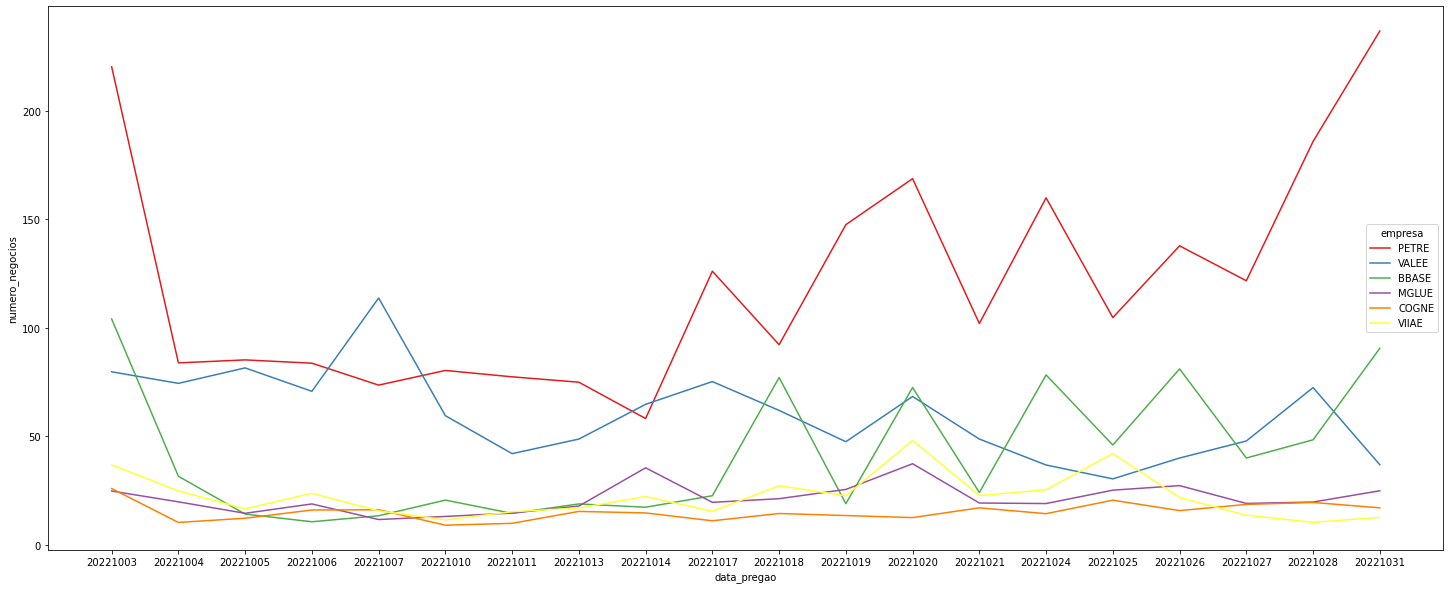

In [107]:
plt.figure(figsize=(25,10))
sns.lineplot(data=empresas, x="data_pregao", y="numero_negocios", hue="empresa", err_style=None)
# Lembrando que 202210 -> mes de outubro em 2022

<AxesSubplot:xlabel='data_pregao', ylabel='preco_ultimo_negocio'>

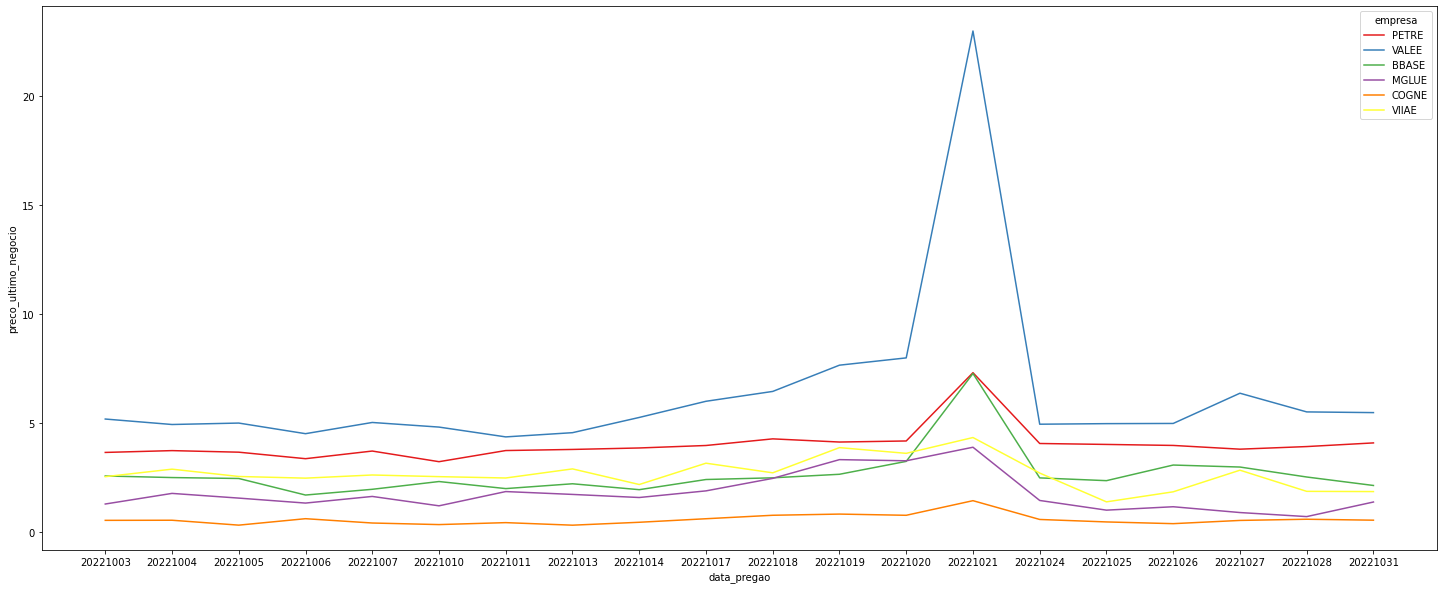

In [108]:
plt.figure(figsize=(25,10))
sns.lineplot(data=empresas, x="data_pregao", y="preco_ultimo_negocio", hue="empresa", err_style=None)

<AxesSubplot:xlabel='data_pregao', ylabel='volume_total_negociado'>

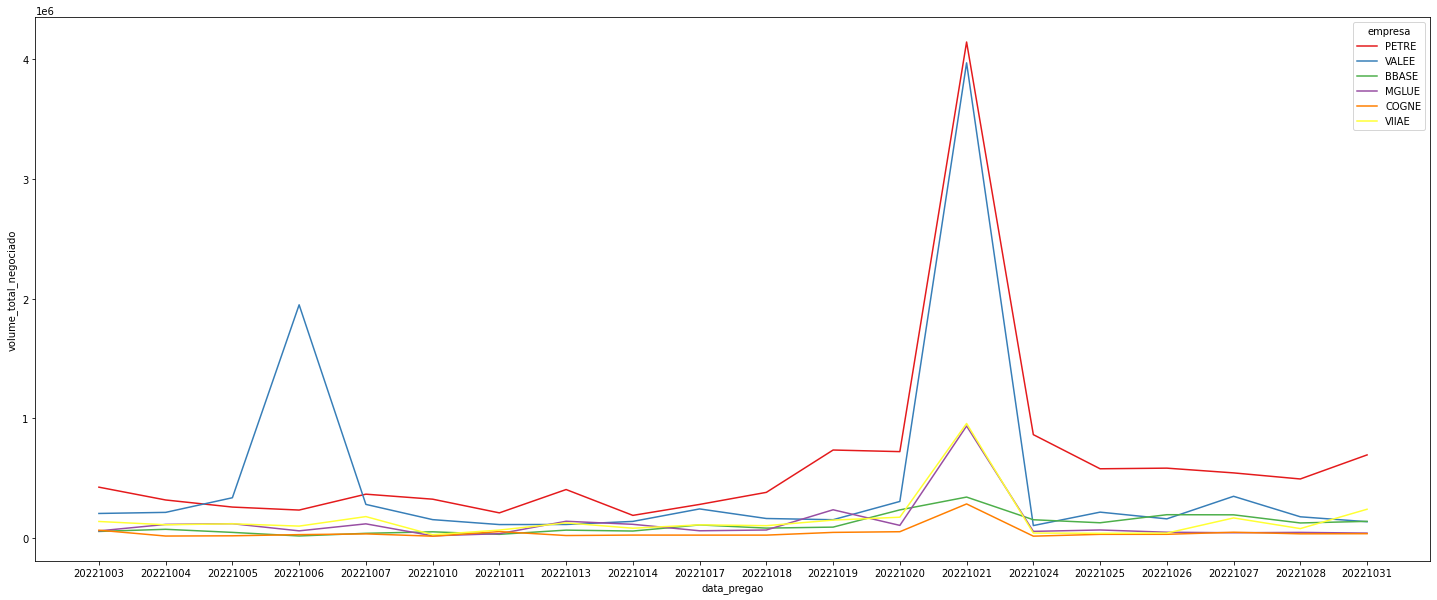

In [109]:
plt.figure(figsize=(25,10))
sns.lineplot(data=empresas, x="data_pregao", y="volume_total_negociado", hue="empresa", err_style=None)

<AxesSubplot:xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

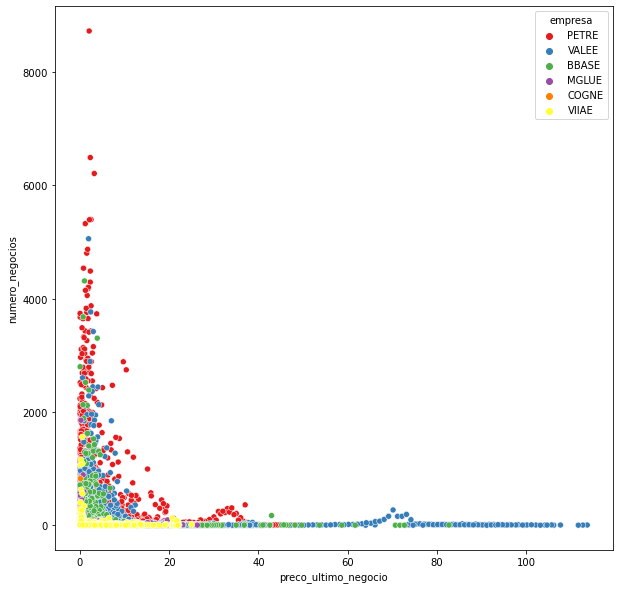

In [134]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=empresas, x='preco_ultimo_negocio', y='numero_negocios', hue="empresa")

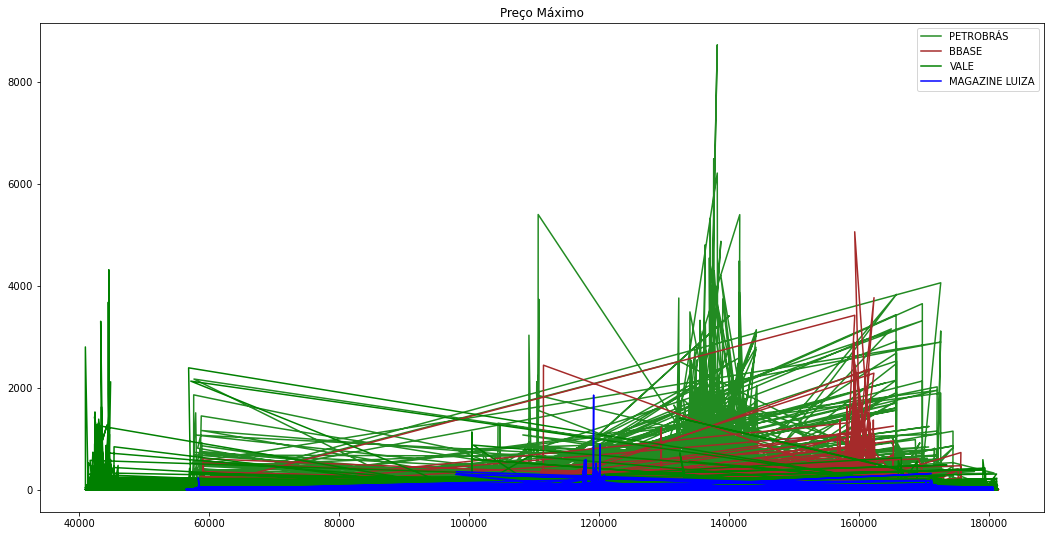

In [111]:
empresa_1['numero_negocios'].plot(label = "PETROBRÁS", color = "forestgreen", figsize = (18,9))
empresa_2['numero_negocios'].plot(label = "BBASE", color = 'brown')
empresa_3['numero_negocios'].plot(label = "VALE", color = 'green')
empresa_4['numero_negocios'].plot(label = "MAGAZINE LUIZA", color = 'blue')



plt.title('Preço Máximo')
plt.legend()
plt.show()

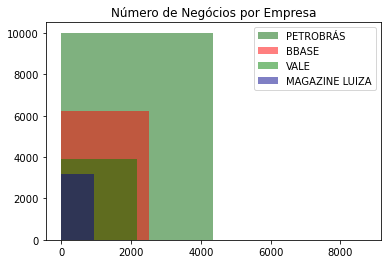

In [112]:
plt.hist(empresa_1['numero_negocios'], alpha=0.5, label='PETROBRÁS', bins=2, color='darkgreen')
plt.hist(empresa_2['numero_negocios'], alpha=0.5, label='BBASE', bins=2, color='red')
plt.hist(empresa_3['numero_negocios'], alpha=0.5, label='VALE', bins=2, color='g')
plt.hist(empresa_4['numero_negocios'], alpha=0.5, label='MAGAZINE LUIZA', bins=2, color='darkblue')
plt.title("Número de Negócios por Empresa")
plt.legend()
plt.rcParams['figure.figsize'] = (12, 9)

<AxesSubplot:xlabel='data_pregao', ylabel='preco_ultimo_negocio'>

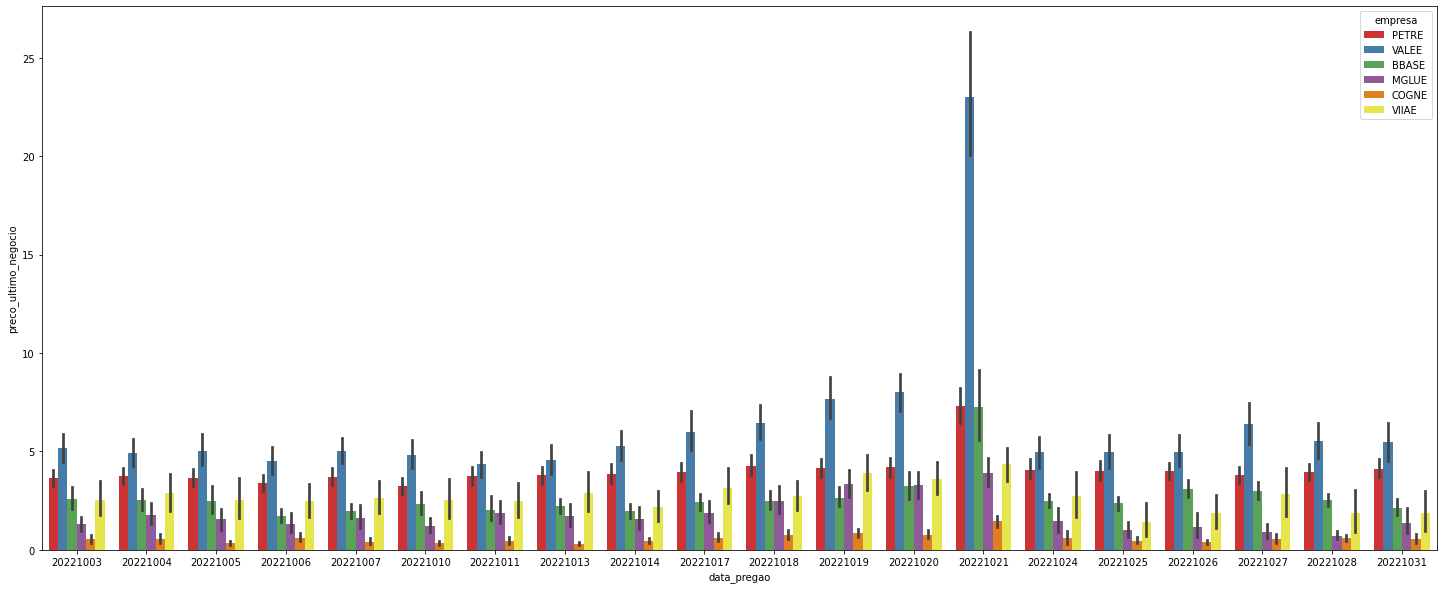

In [113]:
plt.figure(figsize=(25,10))
sns.barplot(data=empresas, x="data_pregao", y="preco_ultimo_negocio", hue = "empresa")

In [114]:
fig = px.scatter(empresas, x = 'numero_negocios', y = 'preco_maximo', color = 'empresa', hover_name = "empresa", log_x = True, width = 800)
fig.update_traces(marker=dict(size = 10,line = dict(width = 1)),selector=dict(mode = 'markers'))
fig.update_layout(title = 'Análise de Nº de Negócios vs. Preço Máximo')
fig.update_xaxes(title = 'Nº de Negócios')
fig.update_yaxes(title = 'Preço Máximo')
fig.show()

<AxesSubplot:xlabel='numero_negocios', ylabel='empresa'>

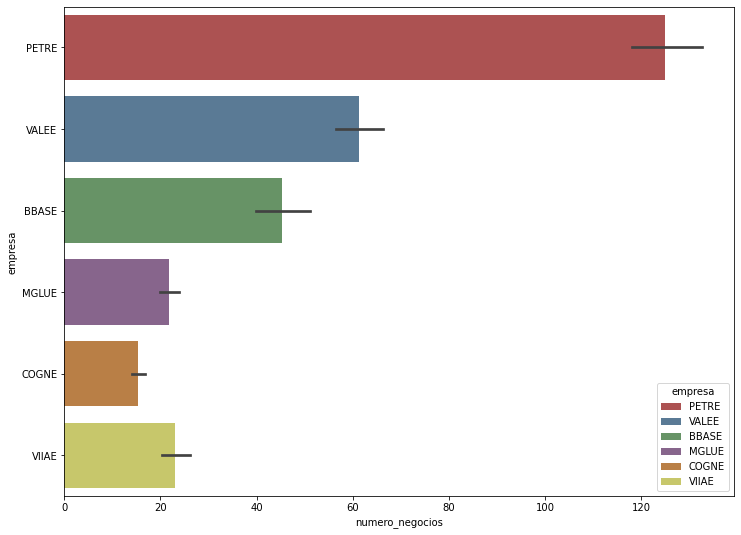

In [115]:
sns.barplot(data=empresas, y="empresa", x="numero_negocios", hue="empresa", saturation=0.45, orient = 'h', linewidth=3, dodge=False)

In [116]:
empresas_lite = empresas[["data_pregao", "empresa", "preco_abertura", "preco_maximo", "quantidade_papeis_negociados", "volume_total_negociado" ]]

In [117]:
empresas_lite['quantidade_papeis_negociados'].unique()

array([7.0000e+03, 5.0000e+02, 1.1000e+03, ..., 1.0422e+06, 2.6130e+05,
       4.4790e+05])

In [118]:
emp1 = empresas_lite.loc[(empresas_lite['empresa'] == 'PETRE') & (empresas_lite['preco_maximo'] == 49.77)]
emp2 = empresas_lite.loc[(empresas_lite['empresa'] == 'VALEE') & (empresas_lite['preco_maximo'] == 113.66)]
emp3 = empresas_lite.loc[(empresas_lite['empresa'] == 'BBASE') & (empresas_lite['preco_maximo'] > 80)]
emp4 = empresas_lite.loc[(empresas_lite['empresa'] == 'MGLUE') & (empresas_lite['preco_maximo'] > 26.20)]

In [119]:
list = []
for value in empresas_lite.columns.values:
    list.append(value)

In [120]:
df = pd.DataFrame(emp1, columns = list)

In [121]:
dff = pd.concat([emp1, emp2, emp3, emp4])

# - K-means (Algoritmo de Lloyd Max)

In [122]:
#import k-means module to work with
from sklearn.cluster import KMeans

## -- Comparing Last Price with Number of Trades

### + Company: Petrobrás

#### > Ellbow Method to determine the number of clusters

In [123]:
df_group = empresa_1[['preco_ultimo_negocio', 'numero_negocios']]

<AxesSubplot:>

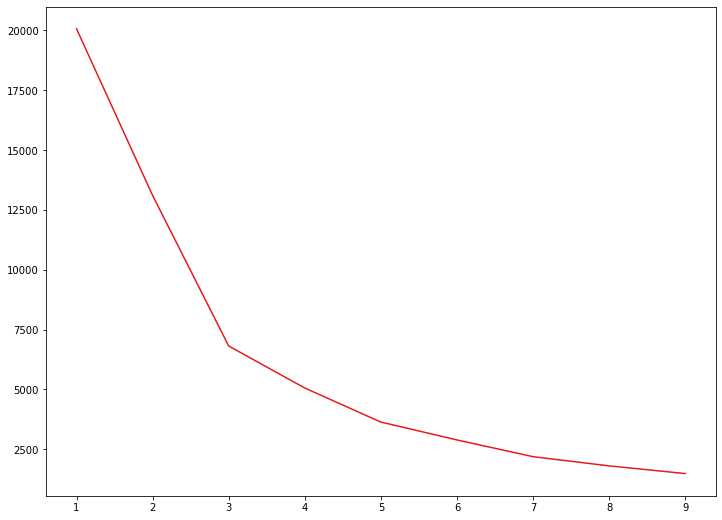

In [124]:
disps = []
scaler_object = StandardScaler()
df_group_elb = scaler_object.fit_transform(df_group)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_group_elb)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

### > Separate the dataset into groups

In [125]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_group)

KMeans(n_clusters=5)

<AxesSubplot:xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

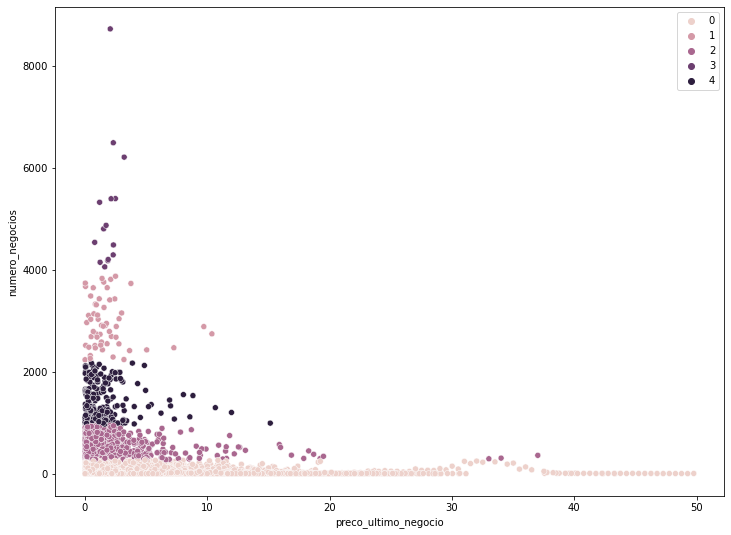

In [126]:
sns.scatterplot(data=df_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeans.labels_)

### + Company: Cogna

<AxesSubplot:>

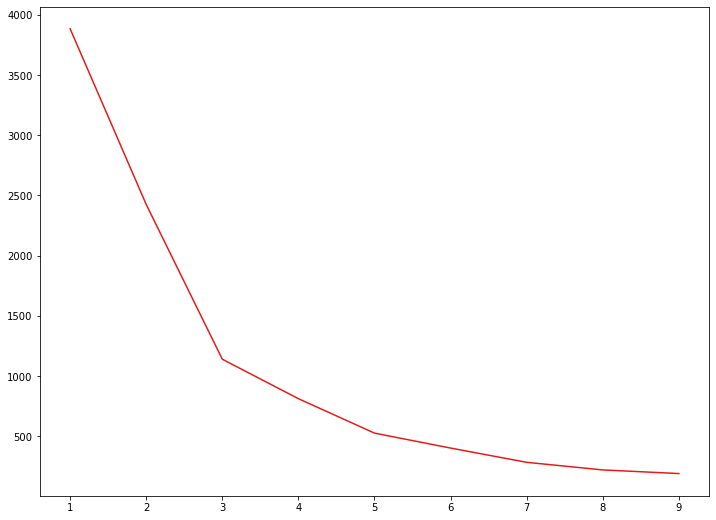

In [127]:
df2_group = empresa_6[['preco_ultimo_negocio', 'numero_negocios']]
disps = []
scaler_object = StandardScaler()
df2_group_elb = scaler_object.fit_transform(df2_group)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2_group_elb)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

<AxesSubplot:xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

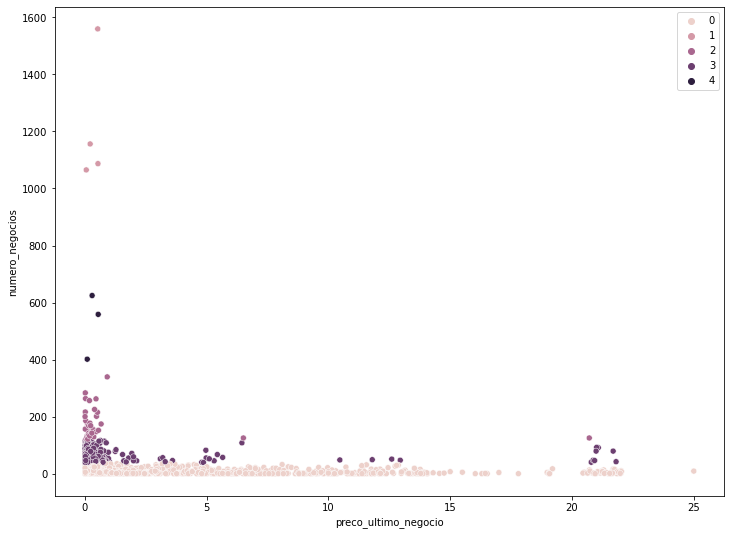

In [128]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df2_group)
sns.scatterplot(data=df2_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeans.labels_)

## -- Comparing Total Trading Volume with Opening Price

### + Company: Petrobrás

<AxesSubplot:>

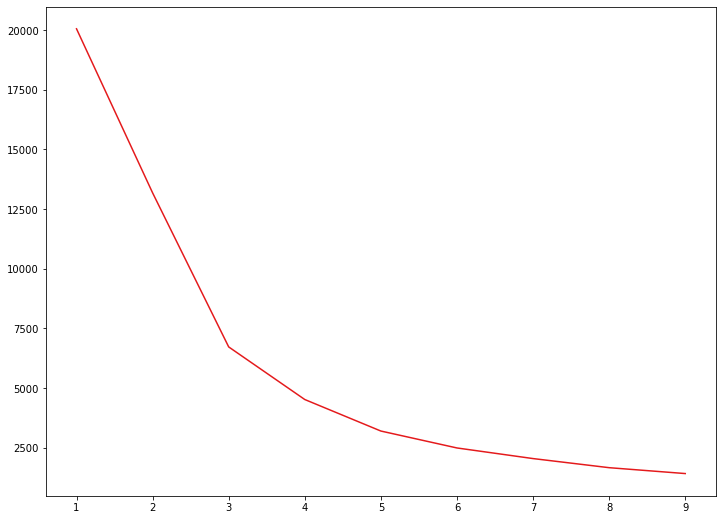

In [129]:
df_group_comparing2 = empresa_1[['volume_total_negociado', 'preco_abertura']]
disps = []
scaler_object = StandardScaler()
df_group_elb_2 = scaler_object.fit_transform(df_group_comparing2)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_group_elb_2)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

<AxesSubplot:xlabel='volume_total_negociado', ylabel='preco_abertura'>

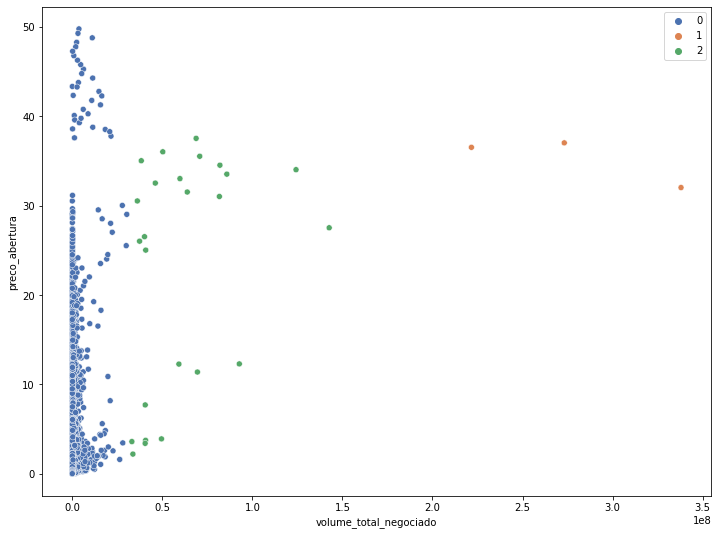

In [130]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_group_comparing2)
sns.scatterplot(data=df_group_comparing2, x='volume_total_negociado', y='preco_abertura', hue=kmeans.labels_, palette="deep")

### + Company: Cogna

<AxesSubplot:>

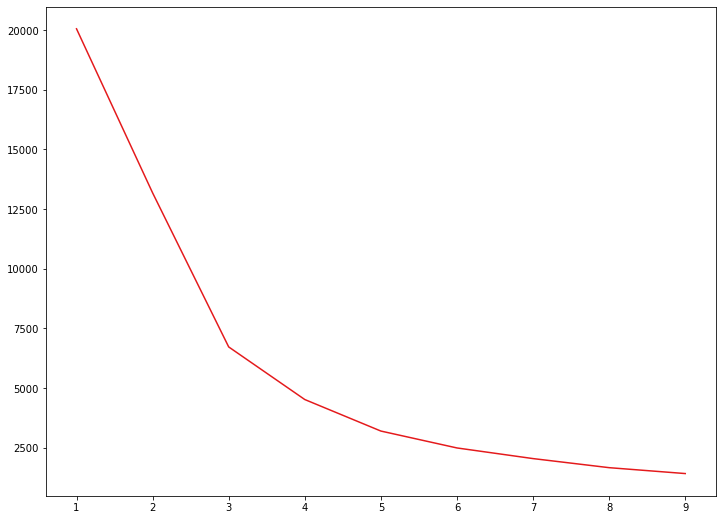

In [131]:
df2_group_comparing2 = empresa_1[['volume_total_negociado', 'preco_abertura']]
disps = []
scaler_object = StandardScaler()
df2_group_elb_2 = scaler_object.fit_transform(df2_group_comparing2)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2_group_elb_2)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

<AxesSubplot:xlabel='volume_total_negociado', ylabel='preco_abertura'>

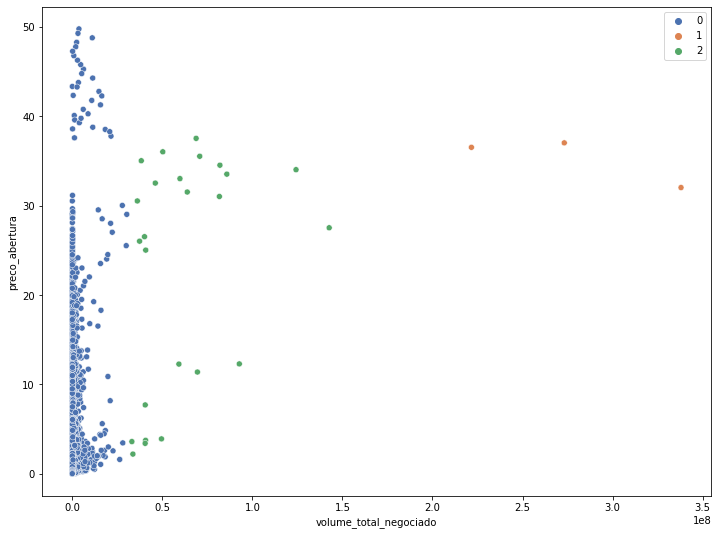

In [132]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2_group_comparing2)
sns.scatterplot(data=df2_group_comparing2, x='volume_total_negociado', y='preco_abertura', hue=kmeans.labels_, palette="deep")

#### Algum padrão foi dectado?

#### Alguma nova pergunta foi descoberta ao analisar os agrupamentos?

## Conclusion

 #### Future works
 As an improvement and future work there is the possibility of improving the anapy library;
This library aims to provide less common but relevant static measures for the field of this analysis and these functions can be used in similar work in the business intelligence application domain